# Installing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

/Users/baniyas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing tha Dataset

In [2]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
#There are 2200 rows and 8 columns in the dataset.

#Checking for missing values

In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
#Checking for duplicate data in the dataset.

In [7]:
crop.duplicated().sum()

0

#Checking for datatype in the dataset

In [8]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#Statistics of the dataset

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [10]:
#Correlation between the varaiables

In [11]:
corr = crop.corr()

In [12]:
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

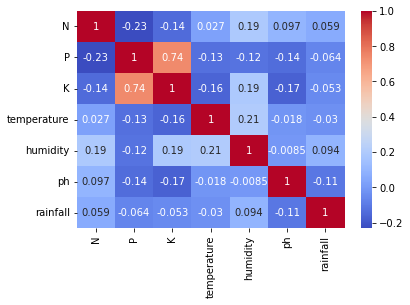

In [13]:
sns.heatmap(corr, annot=True, cbar= True, cmap='coolwarm')

#Encoding the categorical variable

In [14]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [15]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
crop_dict = {
    'rice':1,
    'maize':2, 
    'chickpea':3, 
    'kidneybeans':4, 
    'pigeonpeas':5,
    'mothbeans':6, 
    'mungbean':7, 
    'blackgram':8, 
    'lentil':9, 
    'pomegranate':10,
    'banana':11, 
    'mango':12, 
    'grapes':13, 
    'watermelon':14, 
    'muskmelon':15, 
    'apple':16,
    'orange':17, 
    'papaya':18, 
    'coconut':19, 
    'cotton':20, 
    'jute':21, 
    'coffee':21
}

crop['label_num'] = crop['label'].map(crop_dict)

In [17]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


#Finding the average of Different Variables

In [18]:
print("Average ratio of Nitrogen in soil:{0: .2f}".format(crop["N"].mean()))
print("Average ratio of Phosphorous in soil:{0: .2f}".format(crop["P"].mean()))
print("Average ratio of Potassium in soil:{0: .2f}".format(crop["K"].mean()))
print("Average ratio of Temperature in soil:{0: .2f}".format(crop["temperature"].mean()))
print("Average ratio of Humidity in soil:{0: .2f}".format(crop["humidity"].mean()))
print("Average ratio of Ph in soil:{0: .2f}".format(crop["ph"].mean()))
print("Average ratio of Rainfall in soil:{0: .2f}".format(crop["rainfall"].mean()))

Average ratio of Nitrogen in soil: 50.55
Average ratio of Phosphorous in soil: 53.36
Average ratio of Potassium in soil: 48.15
Average ratio of Temperature in soil: 25.62
Average ratio of Humidity in soil: 71.48
Average ratio of Ph in soil: 6.47
Average ratio of Rainfall in soil: 103.46


#Summary Statistics of each crop

In [19]:
@interact
def summary(crops = list(crop['label'].value_counts().index)):
    x = crop[crop['label']==crops]
    print("---------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:",x['N'].min())
    print("Average Nitrogen required:",x['N'].mean())
    print("Maximum Nitrogen required:",x['N'].max())
    
    print("---------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:",x['P'].min())
    print("Average Phosphorous required:",x['P'].mean())
    print("Maximum Phosphorous required:",x['P'].max())
    
    print("---------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:",x['K'].min())
    print("Average Potassium required:",x['K'].mean())
    print("Maximum Potassium required:",x['K'].max())
    
    print("---------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {: .2f}".format(x['temperature'].min()))
    print("Average Temperature required: {: .2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {: .2f}".format(x['temperature'].max()))
    
    print("---------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {: .2f}".format(x['humidity'].min()))
    print("Average Humidity required: {: .2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {: .2f}".format(x['humidity'].max()))
    
    print("---------------------------------------")
    print("Statistics for Ph")
    print("Minimum Ph required: {: .2f}".format(x['ph'].min()))
    print("Average Ph required: {: .2f}".format(x['ph'].mean()))
    print("Maximum Ph required: {: .2f}".format(x['ph'].max()))
 
    print("---------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {: .2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {: .2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {: .2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# Data Visualisation

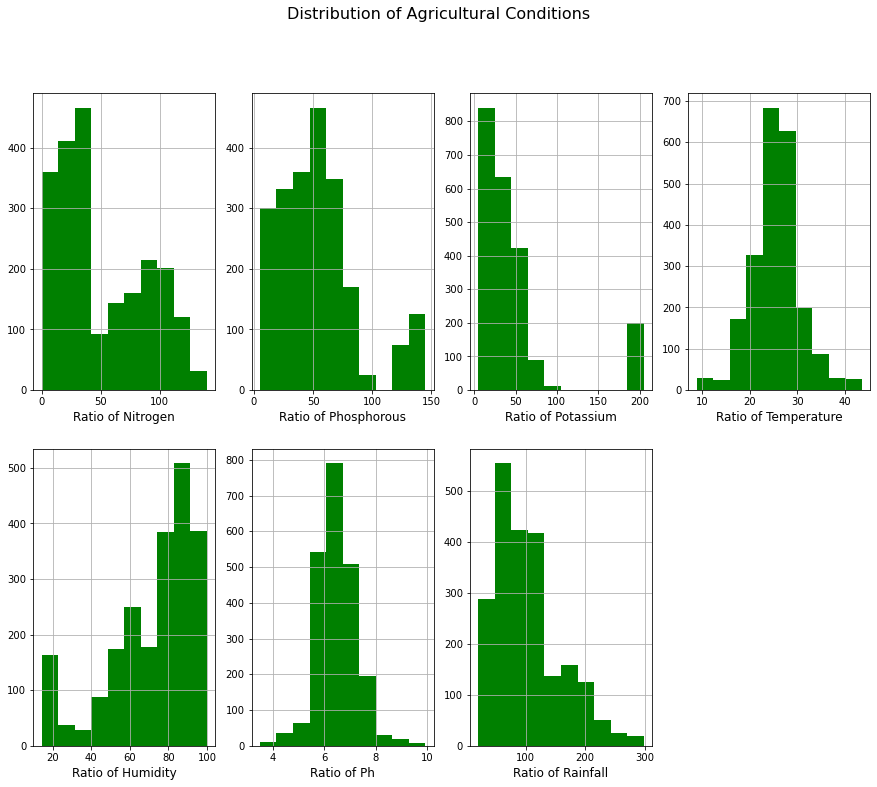

In [20]:
plt.figure(figsize=(15, 12))
plt.subplot(2,4,1)
plt.hist(crop['N'],  color='green', linestyle='-')
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid(True)

plt.subplot(2,4,2)
plt.hist(crop['P'],  color='green', linestyle='-')
plt.xlabel('Ratio of Phosphorous', fontsize=12)
plt.grid(True)

plt.subplot(2,4,3)
plt.hist(crop['K'],  color='green', linestyle='-')
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid(True)

plt.subplot(2,4,4)
plt.hist(crop['temperature'],  color='green', linestyle='-')
plt.xlabel('Ratio of Temperature', fontsize=12)
plt.grid(True)

plt.subplot(2,4,5)
plt.hist(crop['humidity'],  color='green', linestyle='-')
plt.xlabel('Ratio of Humidity', fontsize=12)
plt.grid(True)

plt.subplot(2,4,6)
plt.hist(crop['ph'],  color='green', linestyle='-')
plt.xlabel('Ratio of Ph', fontsize=12)
plt.grid(True)

plt.subplot(2,4,7)
plt.hist(crop['rainfall'],  color='green', linestyle='-')
plt.xlabel('Ratio of Rainfall', fontsize=12)
plt.grid(True)


plt.suptitle('Distribution of Agricultural Conditions', fontsize=16)
plt.show()

#Let's Draw Some Interesting Facts

In [21]:
print("Some Interesting Facts")
print("-----------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:",crop[crop['N'] >120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:",crop[crop['P'] >100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:",crop[crop['K'] >200]['label'].unique())
print("Crops which requires very High Rainfall:",crop[crop['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature:",crop[crop['temperature'] >10]['label'].unique())
print("Crops which requires very High Temperature:",crop[crop['temperature'] >40]['label'].unique())
print("Crops which requires very Low Humidity:",crop[crop['humidity'] >20]['label'].unique())
print("Crops which requires very Low pH:",crop[crop['ph'] < 5]['label'].unique())
print("Crops which requires very High pH :",crop[crop['ph'] > 9]['label'].unique())

Some Interesting Facts
-----------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidity: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low pH: ['

#Seasonal Crop Recommendations

In [22]:
print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity']>50)]['label'].unique())
print("---------------------------------------")
print("Winter Crops")      
print(crop[(crop['temperature']<20) & (crop['humidity']>30)]['label'].unique())
print("---------------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall']>200) & (crop['humidity']>30)]['label'].unique())
print("---------------------------------------")


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']
---------------------------------------


In [23]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [24]:
crop.drop('label',axis=1, inplace=True)

In [25]:
#Split the dataset into features and labels

X = crop.iloc[:, :-1]
Y = crop.iloc[:, -1]

In [26]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [27]:
X.shape

(2200, 7)

In [28]:
Y.shape

(2200,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((1540, 7), (660, 7), (1540,), (660,))

In [32]:
#Scale the features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Models

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

model_names = []
accuracies = []

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    print(f'Accuracy score of {name}: {acc:.4f}')
    


Accuracy score of Linear Discriminant Analysis: 0.9455
Accuracy score of Logistic Regression: 0.9500
Accuracy score of Naive Bayes: 0.9909
Accuracy score of Support Vector Machine: 0.9652
Accuracy score of K-Nearest Neighbors: 0.9788
Accuracy score of Decision Tree: 0.9818


/Users/baniyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of Random Forest: 0.9924
Accuracy score of Bagging: 0.9864
Accuracy score of AdaBoost: 0.1652
Accuracy score of Gradient Boosting: 0.9803
Accuracy score of Extra Trees: 0.8803


# Accurcay Comparison

In [35]:
#Let's create a dataframe using above results

model_comparison_crop = pd.DataFrame({'Model':model_names,'Accuracy':accuracies})

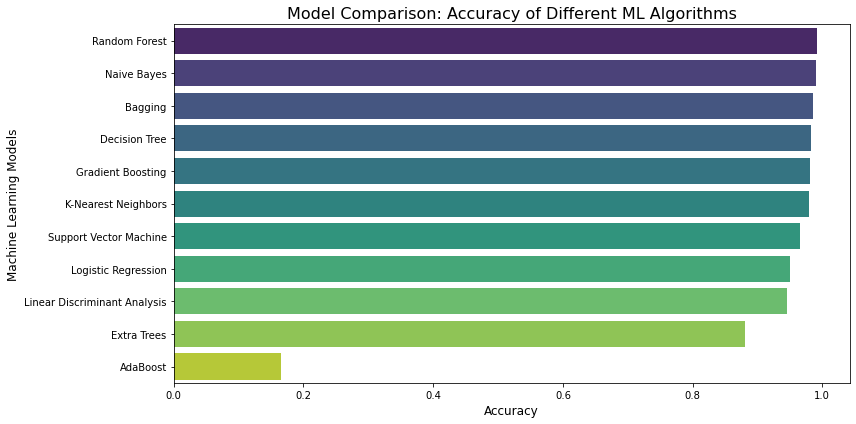

In [36]:
model_comparison_crop = model_comparison_crop.sort_values(by='Accuracy',ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=model_comparison_crop, palette='viridis')
plt.title('Model Comparison: Accuracy of Different ML Algorithms', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Machine Learning Models', fontsize=12)


plt.tight_layout()
plt.show()


In [37]:
# Selecting decision tree model:
rdf = RandomForestClassifier()
rdf.fit(X_train,Y_train)
y_pred = rdf.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9924242424242424


In [38]:
#GaussianNB
gnb = GaussianNB()

gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
accuracy_score(Y_test,y_pred)

0.990909090909091

In [39]:
#Predictive Analysis System

In [40]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [41]:
#Define function to make predictions

def predict_crop(N,P,K,temperature,humidity, ph, rainfall):
    input_values = np.array([[N,P,K,temperature,humidity, ph, rainfall]])
    prediction = rdf.predict(input_values)
    return prediction[0]

In [42]:
#new inputs

N = 32
P =26
K = 29
temperature = 23.004459
humidity = 80.158363
ph = 7.840207
rainfall = 263.964248

pred = predict_crop(N,P,K,temperature,humidity, ph, rainfall)

if pred == 1:
    print("Rice is the best crop to be cultivated right there")
elif pred ==2:
    print("Maize is the best crop to be cultivated right there")
elif pred == 3:
    print("Chickpea is the best crop to be cultivated right there")
elif pred ==4:
    print("Kidneybeans is the best crop to be cultivated right there")
elif pred == 5:
    print("Pigeonpeas is the best crop to be cultivated right there")
elif pred ==6:
    print("Mothbeans is the best crop to be cultivated right there")
elif pred == 7:
    print("Mungbean is the best crop to be cultivated right there")
elif pred ==8:
    print("Blackgram is the best crop to be cultivated right there")
elif pred == 9:
    print("Lentil is the best crop to be cultivated right there")
elif pred ==10:
    print("Pomogranate is the best crop to be cultivated right there")
elif pred == 11:
    print("Banana is the best crop to be cultivated right there")
elif pred ==12:
    print("Mango is the best crop to be cultivated right there")
elif pred == 13:
    print("Grapes is the best crop to be cultivated right there")
elif pred ==14:
    print("Watermelon is the best crop to be cultivated right there")
elif pred == 15:
    print("Muskmelon is the best crop to be cultivated right there")
elif pred ==16:
    print("Apple is the best crop to be cultivated right there")
elif pred == 17:
    print("Orange is the best crop to be cultivated right there")
elif pred ==18:
    print("Papaya is the best crop to be cultivated right there")
elif pred == 19:
    print("Coconut is the best crop to be cultivated right there")
elif pred ==20:
    print("Cotton is the best crop to be cultivated right there")
elif pred == 21:
    print("Jute is the best crop to be cultivated right there")
elif pred ==22:
    print("Coffee is the best crop to be cultivated right there")

Coconut is the best crop to be cultivated right there


/Users/baniyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
#import pickle
#pickle.dump(rfc,open('model.pkl','wb'))
#pickle.dump(ms,open('minmaxscaler.pkl','wb'))